# Demo of task graphs with map and dask.delayed

A live coding demo for embarrassingly parallel workflows using `map` and `dask.delayed`.

## 1. Create a function and inputs to be used with map

The `map` function is built into Python, and it is used to single-input function onto a list of inputs. So let'smake a single-input function and our desired list of inputs.

In [1]:
def inc(x):
    return x +1
inputs = range(4)
inputs

range(0, 4)

## 2. Normal map syntax

Let's first look at how map works normally.

In [3]:
list(map(inc, inputs))

[1, 2, 3, 4]

## 3. Create delayed function

Let's create a delayed version of our function. This is "lazy" because it doesn't actually compute anything, it just sets up data dependencies.

In [4]:
from dask import delayed

del_inc = delayed(inc)

del_inc

Delayed('inc-d1285c7a-ee4b-44ff-9340-1f47d23f50bf')

## 4. Assemble delayed workflow with map

Instead of mapping our original function (which executes right away), now let's use map on our lazy function.

In [5]:
z = list(map(del_inc, inputs))
z

[Delayed('inc-ca08847a-f553-44cf-9635-5087e32fcc8a'),
 Delayed('inc-6ae9a5e4-0ba7-41e0-aa70-6374fbd98865'),
 Delayed('inc-8ac5041a-8a88-43e6-a8a7-7216eb5eeb98'),
 Delayed('inc-334efac0-ea14-4472-8869-8b453eb496a3')]

## 5. Visualize our workflow

Dask has a very useful command to show the task graph. It is a method of dask objects and can be called via `z.visualize()`, or it can be called on non-dask objects via `dask.visualize(z)`.

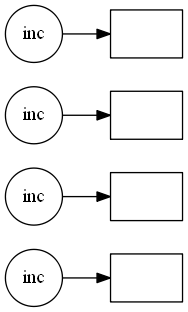

In [8]:
import dask
dask.visualize(z, rankdir='LR')

## 6. Run our computation

Once we're happy that the task graph looks good, we can run the computation. This can be done using the method of dask objects, `z.compute()` or through the dask function `dask.compute(z)`.

Dask uses a scheduler to determine the order of the computations and to pass the necessary data between different computations. We discuss different schedulers next. :)

In [9]:
dask.compute(z)

([1, 2, 3, 4],)